In [12]:
import pandas as pd
import matplotlib.pyplot as plt
file_path_1 = 'C:/Users/лепеха/OneDrive/Рабочий стол/Учеба/ETHUSD.csv'
file_path_2 = 'C:/Users/лепеха/OneDrive/Рабочий стол/Учеба/IceaCreamFrozenDessert.csv'
ETH_df = pd.read_csv(file_path_1)
IceCream_df = pd.read_csv(file_path_2)
import matplotlib.pyplot as plt

In [13]:
import numpy as np

In [14]:
import plotly.express as px

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [16]:
from gtda.time_series import embedding, TakensEmbedding

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
from scipy.stats import entropy

In [17]:
ETH_df = ETH_df.dropna()

Хаотичный вариант

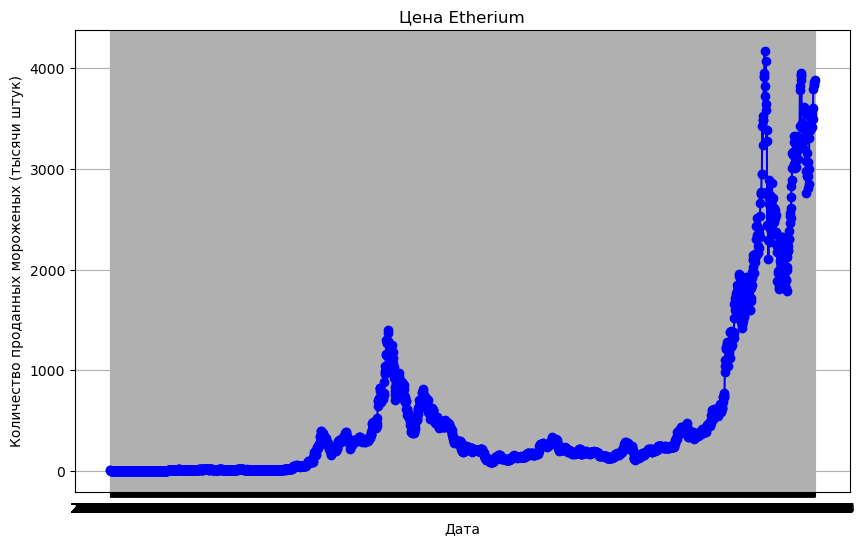

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(ETH_df['Date'], ETH_df['Open'], marker='o', linestyle='-', color='b')
plt.title('Цена Etherium')
plt.xlabel('Дата')
plt.ylabel('Количество проданных мороженых (тысячи штук)')
plt.grid(True)

In [49]:
data = ETH_df[['Open']].to_numpy()
optimal_time_delay, optimal_embedding_dimension = embedding.takens_embedding_optimal_parameters(
    data, 100, 10, stride=1
    )

In [50]:
phase_traj = TakensEmbedding(optimal_time_delay, 3).fit_transform(data.reshape(1, -1))[0]

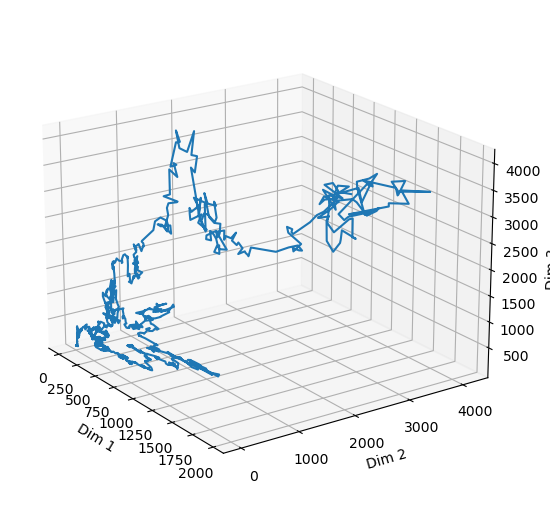

In [51]:
ax = plt.figure(figsize=(5, 5), dpi=100).add_subplot(projection='3d')

ax.plot(phase_traj[:, 0], phase_traj[:, 1], phase_traj[:, 2])

ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')
ax.set_zlabel('Dim 3')

ax.view_init(elev=20., azim=-35, roll=0)
plt.tight_layout(pad=0.1)
plt.show()

In [52]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')

clustering.fit(phase_traj)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [53]:
phase_traj_w_cl = pd.concat([pd.DataFrame(phase_traj, columns=['x', 'y', 'z']), pd.DataFrame(clustering.labels_.reshape(-1, 1), columns=['cluster'])], axis=1)

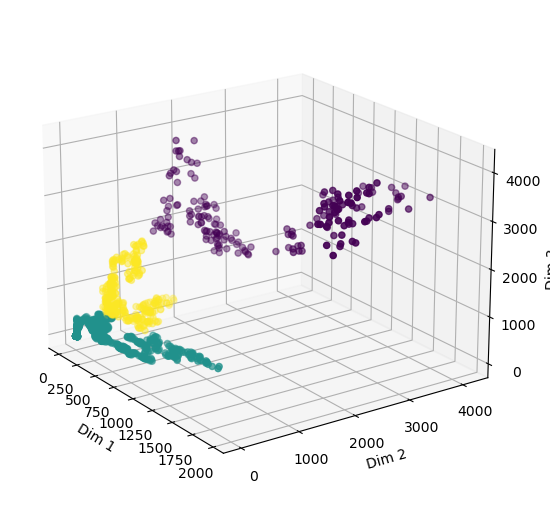

In [54]:
ax = plt.figure(figsize=(5, 5), dpi=100).add_subplot(projection='3d')

ax.scatter(phase_traj_w_cl['x'], phase_traj_w_cl['y'], phase_traj_w_cl['z'], c=phase_traj_w_cl['cluster'])

ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')
ax.set_zlabel('Dim 3')

ax.view_init(elev=20., azim=-35, roll=0)
plt.tight_layout(pad=0.1)
plt.show()

In [55]:
reconstruct_data = np.concatenate([phase_traj_w_cl['x'].values, phase_traj_w_cl['y'][-98:].values, phase_traj_w_cl['z'][-98:].values])

In [56]:
new_cl = np.concatenate([phase_traj_w_cl.cluster.values, phase_traj_w_cl.cluster.values[-98:], phase_traj_w_cl.cluster.values[-98:]])

In [57]:
df = pd.DataFrame(np.array([reconstruct_data, new_cl]).T, columns=['data', 'cl'])

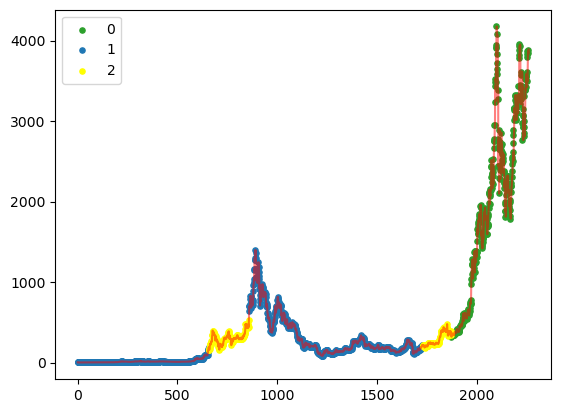

In [58]:
plt.plot(data, alpha=0.5, color='red')
col_array = ['tab:green', 'tab:blue', 'yellow']

for i in range(3):
    plt.scatter(df[df['cl'] == i]['data'].index, df[df['cl'] == i]['data'], c=col_array[i], s=14, label=i)

plt.legend()
plt.show()

In [59]:
prob = []
for i in range(3):
    temp, _ = np.histogram(df[df['cl'] == i]['data'], density=True, bins=len(df[df['cl'] == i])//2)
    prob.append(KSEntr(temp))

In [60]:
prob

[2.6641657108638346, 2.173745715332282, 2.6608972094021794]

In [61]:
prob = []
for i in range(3):
    temp, _ = np.histogram(df[df['cl'] == i]['data'], density=True, bins=len(data))
    prob.append(entropy(temp, base=2))

In [62]:
max(prob)

8.351026908298298

In [63]:
def KSEntr(data):
    l=len(data)
    e=[]
    for i in range(1, l//2+1):
        b= l//i
        hist,bins=np.histogram(data, bins=b)
        e.append(entropy(hist/l,  base=2))
    return max(e)

In [64]:
KSEntr(data)

7.989605738171548

Высокое значение энтропии указывает на сложность и хаотичность системы